## Проверка центральной предельной теореме на примере бета-распределения

### Теория
Бета-распределение в теории вероятностей и статистике — двухпараметрическое семейство абсолютно непрерывных распределений. Используется для описания случайных величин, значения которых ограничены конечным интервалом. 

Пусть распределение случайной величины ${\displaystyle X}$ задаётся плотностью вероятности $f_{X}$, имеющей вид:

\begin{equation*}
f_{X}(x)={\frac {1}{\mathrm {B} (\alpha ,\beta )}}\,x^{\alpha -1}(1-x)^{\beta -1},
\end{equation*}

где:
 - $\alpha ,\beta >0$ произвольные фиксированные параметры, и
 - $\mathrm {B} (\alpha ,\beta )=\int \limits _{0}^{1}x^{\alpha -1}(1-x)^{\beta -1}\,dx$ — бета-функция.
 
 Тогда случайная величина $\displaystyle X$ имеет бета-распределение. Пишут: $\displaystyle X\!\sim \mathrm {B} (\alpha ,\beta )$



### Построим теоретический график плотности распределения

Чтобы график плотности распределения был как можно меньше похож на график нормального распределения, выберем параметры $\alpha$ и $\beta$ равными $0.5$.

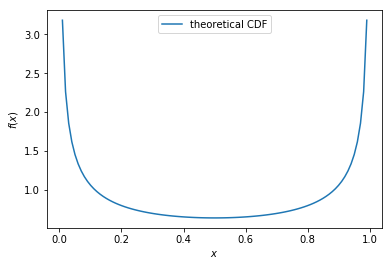

In [17]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Создадим переменные для параметров распределения
a, b = 0.5, 0.5

# Выделем код построения плотности бета-распределения в отдельную функцию, т.к. мы будем его использовать дальше
def draw_theoretical_CDF(a, b):
    x = np.linspace(0, 1, 100)
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label='theoretical CDF')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper center')
    
draw_theoretical_CDF(a, b)
plt.show()

### Построим гистограмму выборки

Для этого сгенерируем выборку из 1 000 значений.

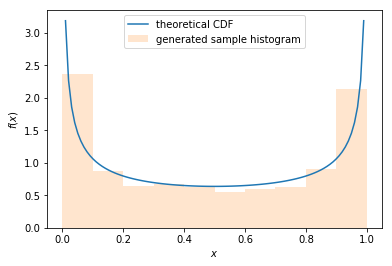

In [43]:
sample = beta.rvs(a, b, size=1000)
draw_theoretical_CDF(a, b)
plt.hist(sample, normed = True,  alpha=0.2, label = 'generated sample histogram')
plt.xlabel('$x$')
plt.legend(loc='upper center')
plt.show()


### Оценка выборочного среднего при разных объемах выборок

Построим гистограмму выборочного среднего для 1000 выборок размера n (5, 10, 50, 100). Для этого напишем функцию, которая на вход будет принимать размер выборки n, а в качестве результата будет строить гистограмму и теоретический график плотности распределения.

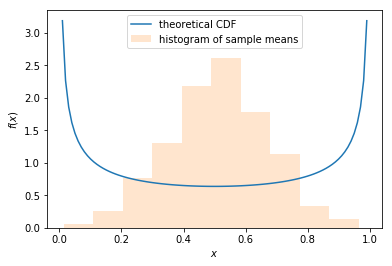

In [44]:
def generate_sample_means_histogram(n):
    sample = []
    
    # Сгенерируем массив из 1000 выборочных средних, посчитанных на выборках размера n
    for i in range(1000):
        subsample = beta.rvs(a, b, size = n)
        sample.append(sum(subsample) / n)
    
    # Построем теоретическое распределение вероятности
    draw_theoretical_CDF(a, b)
    
    # Построим гистограмму из получившегося массива выборочных средних
    plt.hist(sample, normed = True,  alpha=0.2, label = 'histogram of sample means')
    plt.xlabel('$x$')
    plt.legend(loc='upper center')
    plt.show()
    
# Построим гистограмму для n = 5
generate_sample_means_histogram(5)

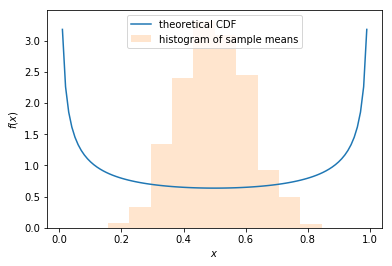

In [48]:
# Построим гистограмму для n = 10
generate_sample_means_histogram(10)

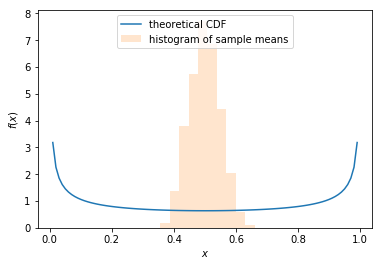

In [49]:
# Построим гистограмму для n = 50
generate_sample_means_histogram(50)

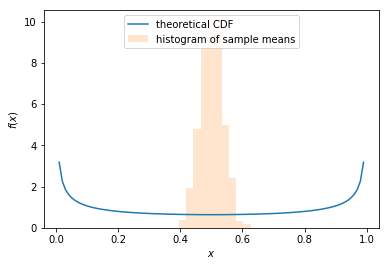

In [50]:
# Построим гистограмму для n = 100
generate_sample_means_histogram(100)

Добавим в функцию **generate_sample_means_histogram** построение графика нормального распределения с параметрами, расчитанными по формулам для бета-распределения.

Математическое ожидание бета распределения: $\mathbb {E} [X]={\frac {\alpha }{\alpha +\beta }}$

Дисперсия бета распределения: $\mathrm {D} [X]={\frac {\alpha \beta }{(\alpha +\beta )^{2}(\alpha +\beta +1)}}$



In [ ]:
from scipy.stats import norm
import math

def generate_sample_means_histogram(n):
    sample = []
    
    # Сгенерируем массив из 1000 выборочных средних, посчитанных на выборках размера n
    for i in range(1000):
        subsample = beta.rvs(a, b, size = n)
        sample.append(sum(subsample) / n)
    
    # Расчитаем параметры изначального бета-распределения
    ex = a / (a + b)
    dx = a * b / (((a + b) ** 2) * (a + b + 1))
    
    # Сгенерируем выборку значений из нормального распределения по Центральной предельной теореме
    x = np.linspace(0, 1, 100)
    y = norm.pdf(x, ex, math.sqrt(dx / n))
    
    # Построим функцию плотности нормального распределения
    plt.plot(x, y, label='theoretical PDF')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='upper left')
    
    # Добавим гистограмму на график
    plt.hist(sample, normed = True,  alpha=0.2, label = 'histogram of sample means')
    plt.xlabel('$x$')
    plt.legend(loc='upper left')
    plt.show()
    
# Построим гистограмму для n = 5
generate_sample_means_histogram(5)

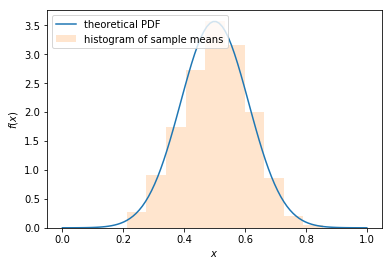

In [63]:
# Построим гистограмму для n = 10
generate_sample_means_histogram(10)

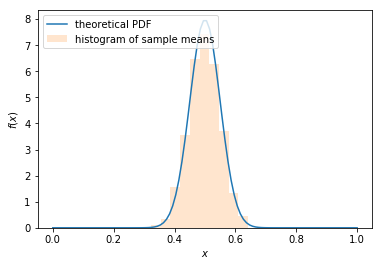

In [64]:
# Построим гистограмму для n = 50
generate_sample_means_histogram(50)

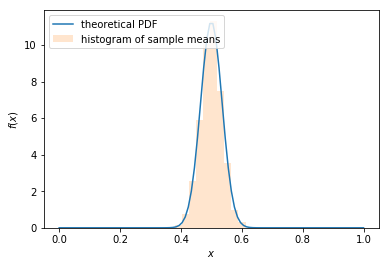

In [65]:
# Построим гистограмму для n = 100
generate_sample_means_histogram(100)

### Вывод

Из проведенного эксперимента видно, что при малых n дисперсия нормального распределения довольно большая, как и разброс гистограммы выборочного среднего. При увеличении n разброс гистограммы и дисперсия нормального распределения уменьшаются => увеличивается точность аппроксимации распределения выборочных средних нормальным распределением. 